## Twitter Sentiment Data Analysis

### Introduction

Twitter sentiment analysis involves evaluating the sentiment expressed in tweets to understand public opinion on various topics. This
analysis can help businesses, politicians, and researchers gauge public mood and make informed decisions.


### Data Description

The Twitter_Data.csv file contains tweets with associated sentiment labels. The dataset typically includes:

Tweet ID: Unique identifier for each tweet.

Tweet Text: The actual content of the tweet.

Sentiment: The sentiment label, which could be positive, negative, or neutral.

<a href='https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset'>Dataset Link </a>



### Purpose of Sentiment Data Analysis

The main purposes of analyzing sentiment data from Twitter include:


<b>Understanding Public Opinion:</b> Gauge the general sentiment of the public on specific topics or events.

<b>Brand Monitoring:</b> Track how customers feel about a brand, product, or service.

<b>Market Research:</b> Identify trends and preferences in the market.

<b>Customer Feedback:</b> Analyze customer feedback to improve products and services.

<b>Crisis Management:</b> Detect negative sentiments early to address potential PR issues.

In [2]:
#Importing Necessary Libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
twitter_df=pd.read_csv('Twitter_Data.csv')

In [4]:
twitter_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [5]:
twitter_df.isnull().sum()
twitter_df.dropna(inplace=True)

In [6]:
twitter_df=twitter_df.drop_duplicates('clean_text')
twitter_df.shape

(162969, 2)

In [7]:
#Add new column with the help of sentiment scores
def sentiment(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

twitter_df['Sentiment']=twitter_df['category'].apply(sentiment)


In [8]:
twitter_df.sample(5)

,clean_text,category,Sentiment
67852,ties with china would better had modi governme...,1.0,Positive
141471,and hate for modi driven low coz his entire po...,-1.0,Negative
78219,try your level best but not again 2019,1.0,Positive
119575,which why keep asking you think that imran kha...,1.0,Positive
116451,will but asked for proof first show that proof...,1.0,Positive


<Axes: xlabel='Sentiment', ylabel='count'>

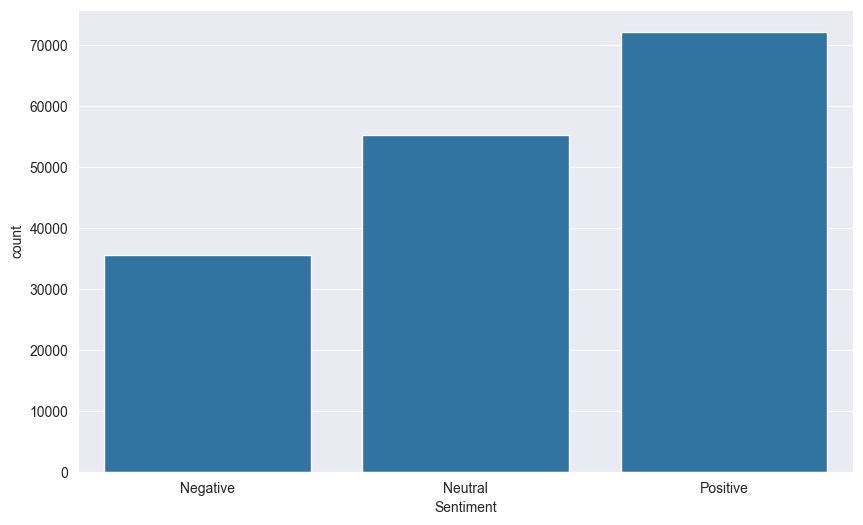

In [9]:
#plot for the scores
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment',data=twitter_df)

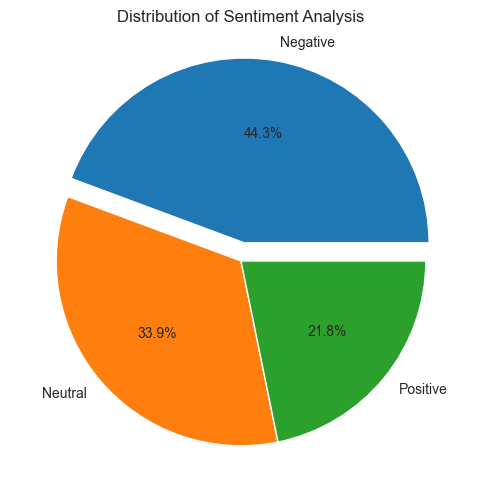

In [10]:
plt.figure(figsize=(10,6))
explode=(0.1,0,0)

plt.pie(twitter_df['Sentiment'].value_counts(),labels=twitter_df['Sentiment'].unique(),autopct='%1.1f%%',explode=explode)
plt.title('Distribution of Sentiment Analysis')
plt.show()

In [11]:
def preprocess(text):
  text=text.lower()
  text=re.sub(r'[^a-zA-Z0-9\s]','',text)
  return text

twitter_df['clean_text']=twitter_df['clean_text'].apply(preprocess)

In [12]:
twitter_df

,clean_text,category,Sentiment
0,when modi promised minimum government maximum ...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,Negative
162976,dear rss terrorist payal gawar what about modi...,-1.0,Negative
162977,did you cover her interaction forum where she ...,0.0,Neutral
162978,there big project came into india modi dream p...,0.0,Neutral


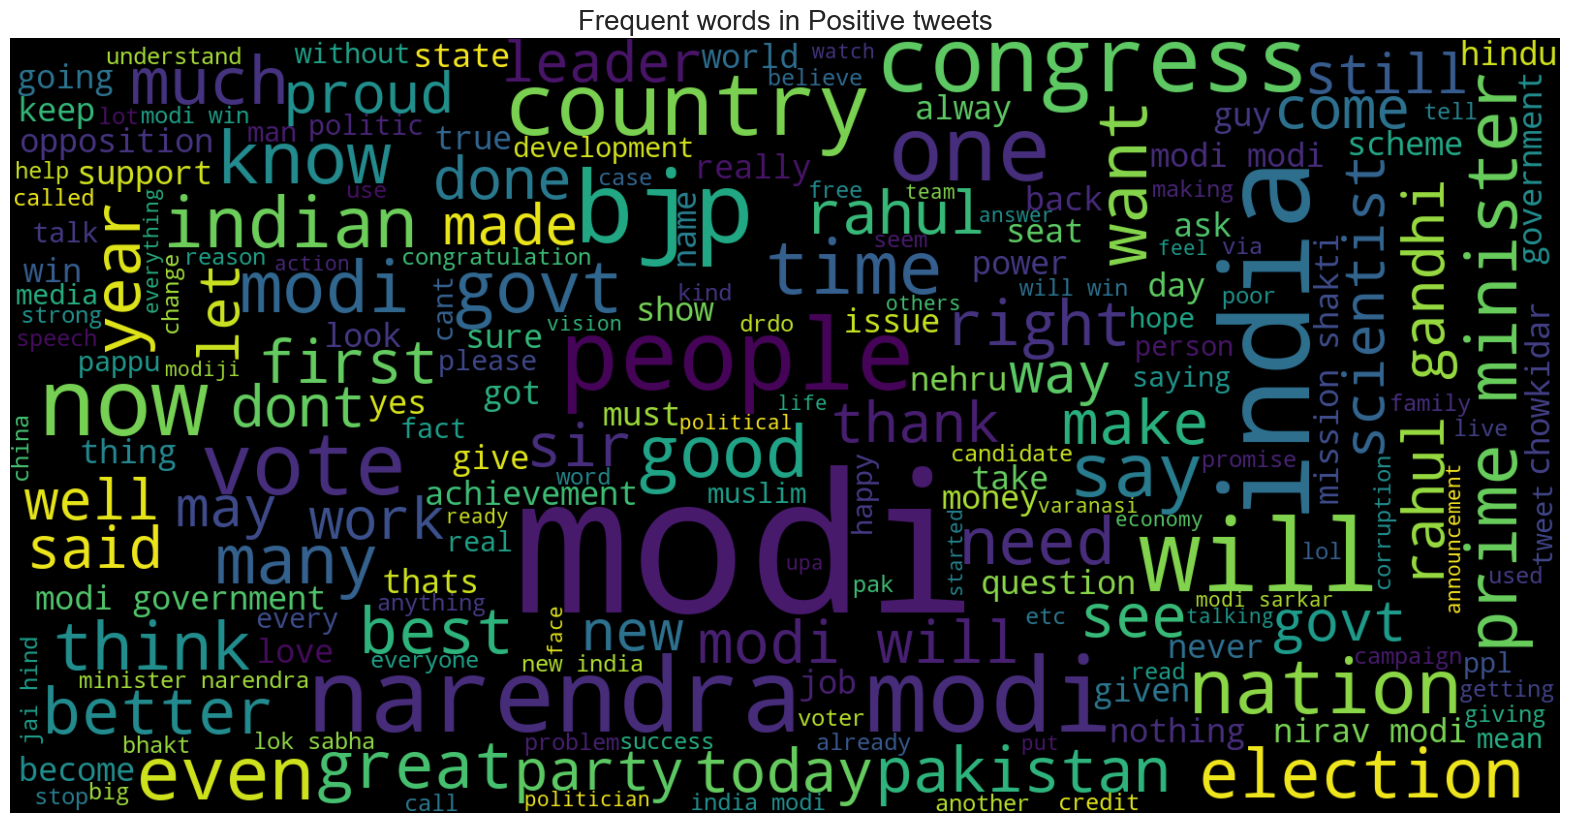

In [13]:
#visualize the Positive score using word cloud
pos_tweets=twitter_df[twitter_df['Sentiment']=='Positive']
pos_tweets=pos_tweets.sort_values(['category'],ascending=False)

text=' '.join(word for word in pos_tweets['clean_text'])
plt.figure(figsize=(20,16))
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Frequent words in Positive tweets",fontsize=20)
plt.axis('off')
plt.show()

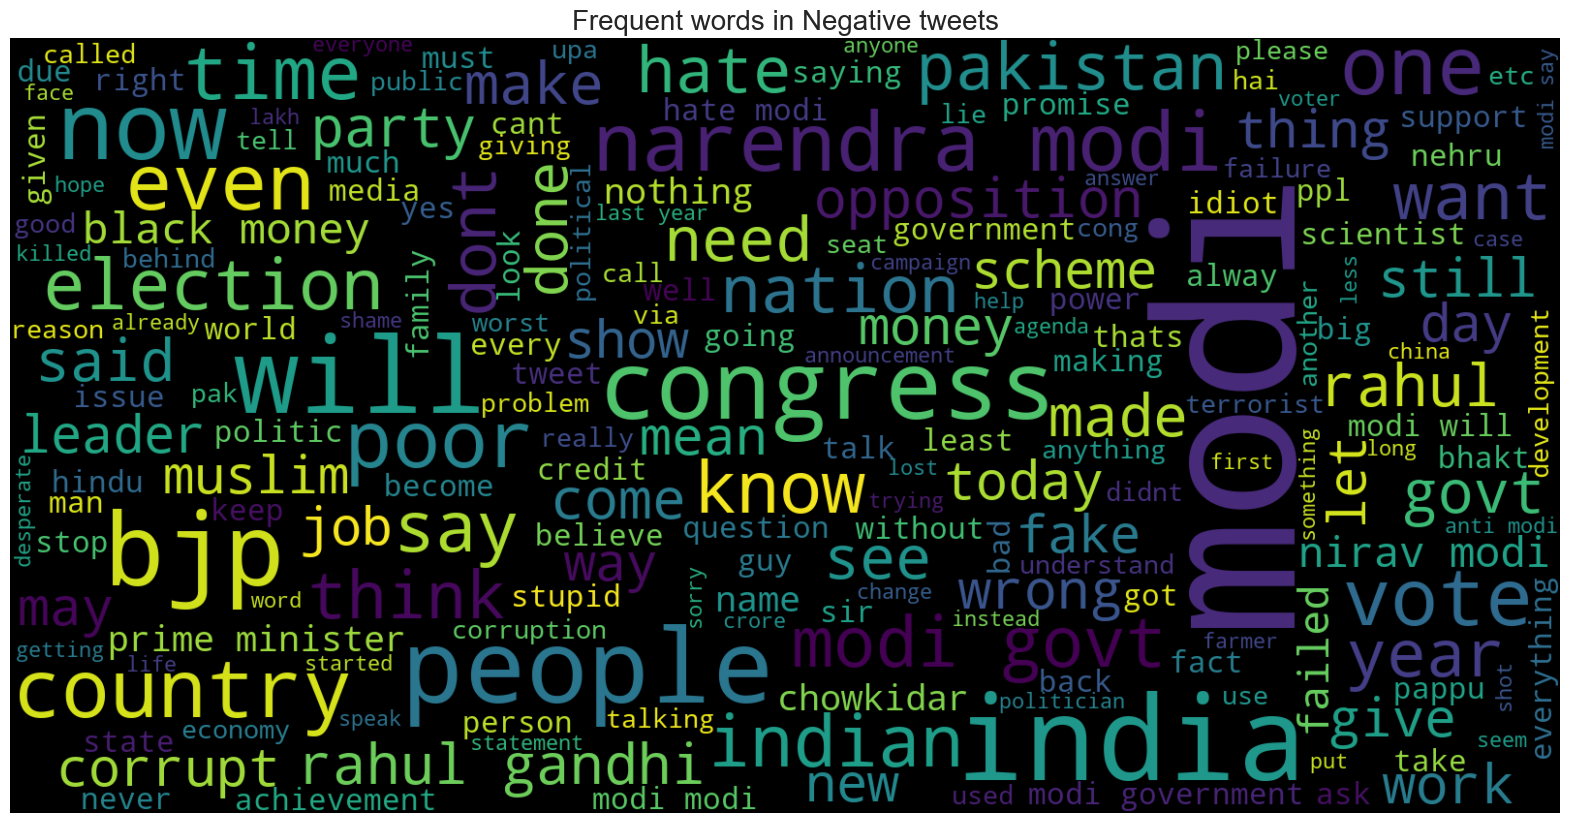

In [14]:
#visualing the negative score using wordcloud
neg_tweets=twitter_df[twitter_df['Sentiment']=='Negative']
neg_tweets=neg_tweets.sort_values(['category'],ascending=False)

text=' '.join(word for word in neg_tweets['clean_text'])
plt.figure(figsize=(20,16))
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Frequent words in Negative tweets",fontsize=20)
plt.axis('off')
plt.show()

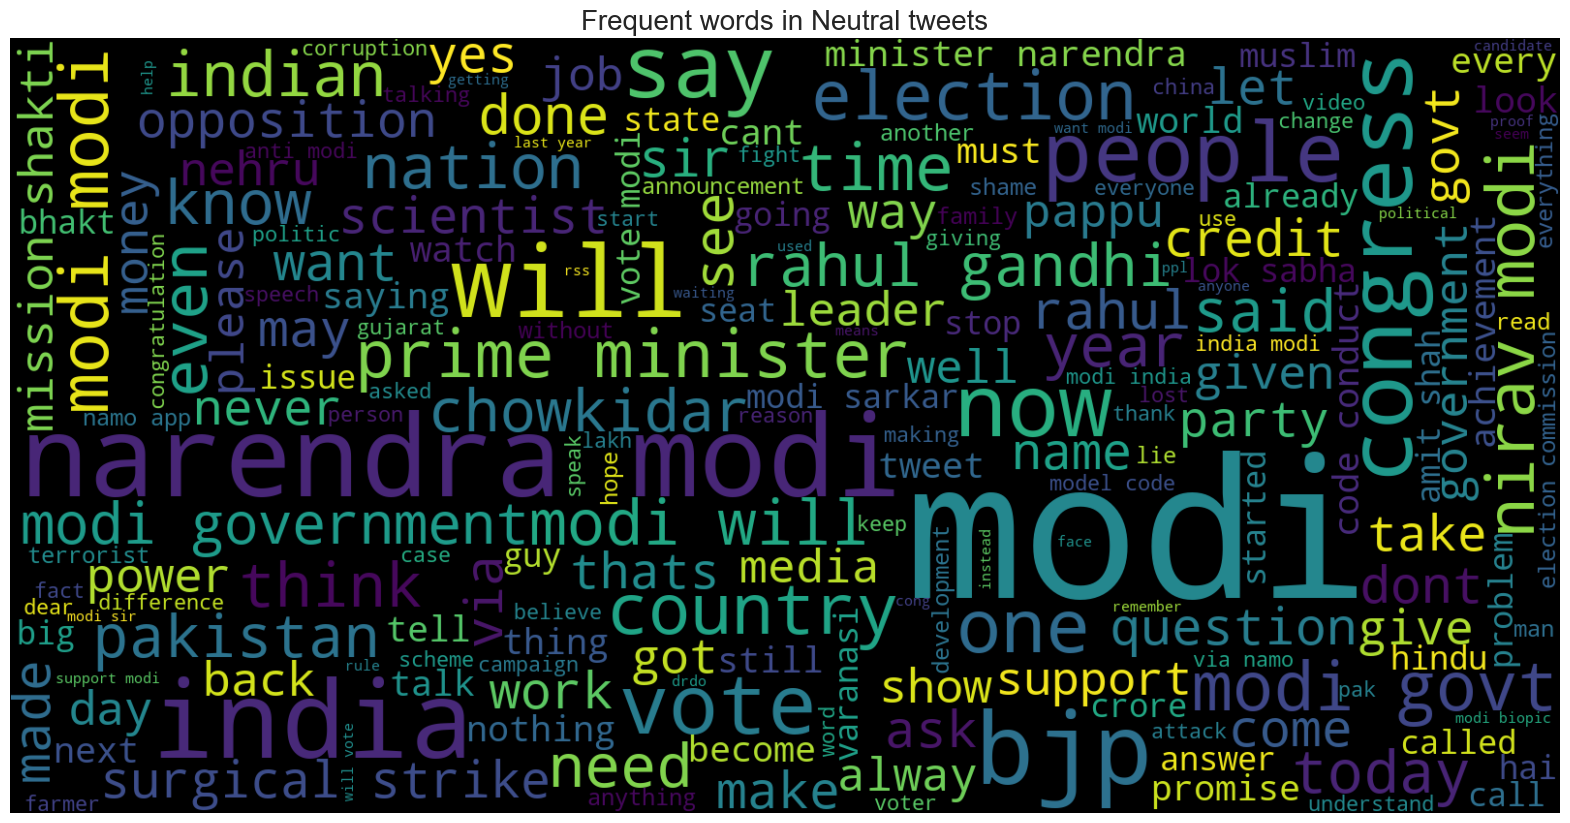

In [15]:
#visualize the Neutral score using word cloud
neutral_tweets=twitter_df[twitter_df['Sentiment']=='Neutral']
neutral_tweets=neutral_tweets.sort_values(['category'],ascending=False)

text=' '.join(word for word in neutral_tweets['clean_text'])
plt.figure(figsize=(20,16))
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Frequent words in Neutral tweets",fontsize=20)
plt.axis('off')
plt.show()

In [16]:
#Vectorizing the model
vect = CountVectorizer(ngram_range=(1,2)).fit(twitter_df['clean_text'])
feature_names= vect.get_feature_names_out()
print("Number of features:{}\n".format(len(feature_names)))
print("First 10 features:\n{}\n".format(feature_names[:10]))

Number of features:1198679

First 10 features:
['000' '000 00000' '000 21000' '000 333' '000 buy' '000 clean' '000 crore'
 '000 crs' '000 death' '000 deaths']



In [17]:
#Tranforming the Model
x=twitter_df['clean_text']
y=twitter_df['Sentiment']
x=vect.transform(x)

In [18]:
#Train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print("Size of X_train",x_train.shape)
print("Size of X_test",x_test.shape)
print("Size of y_train",y_train.shape)
print("Size of y_test",y_test.shape)

Size of X_train (130375, 1198679)
Size of X_test (32594, 1198679)
Size of y_train (130375,)
Size of y_test (32594,)


In [20]:
#Logistic regression Model
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=accuracy_score(y_test,lr_pred)
print("Accuracy of Logistic Regression:",lr_acc)

Accuracy of Logistic Regression: 0.9325642756335522


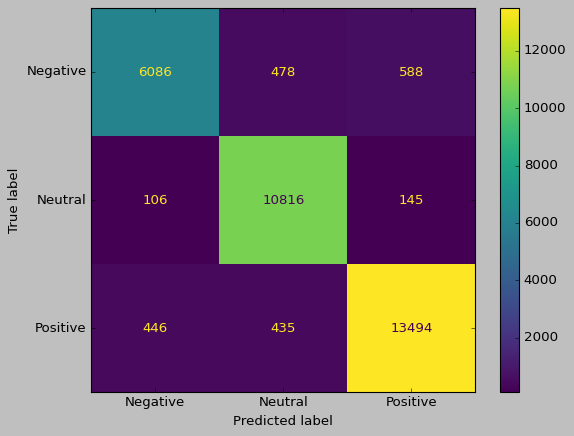

In [21]:
#Confusion matrix
plt.style.use('classic')
cm=confusion_matrix(y_test,lr_pred,labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [22]:
#Support vector machine Model
svm=LinearSVC()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_acc=accuracy_score(y_test,svm_pred)
print("Accuracy of SVM:",svm_acc)

Accuracy of SVM: 0.9448671534638277


In [23]:
#Naive Bayes Model
NB=MultinomialNB()
NB.fit(x_train,y_train)
nb_pred=NB.predict(x_test)
nb_acc=accuracy_score(y_test,nb_pred)
print("Accuracy of Naive Bayes:",nb_acc)

Accuracy of Naive Bayes: 0.6842363625207093


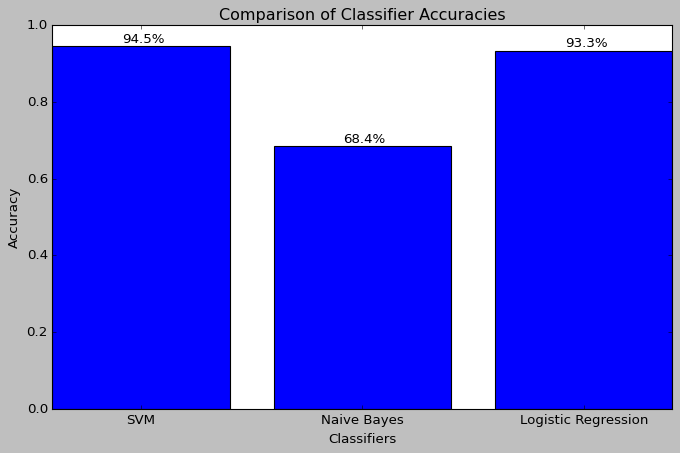

In [24]:
#Comparison of models 
accuracies = [svm_acc, nb_acc, lr_acc]
classifiers = ['SVM', 'Naive Bayes', 'Logistic Regression']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies)
for i,v in enumerate(accuracies):
  plt.text(i+0.01, v+0.02,f"{v*100:.1f}%", ha='center', va='center')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()

***CONCLUSION***

The results of sentiment analysis enable proactive responses to public opinion, fostering better engagement with audiences. Organizations can use these insights to refine strategies, improve products and services, and address potential issues before they escalate. Overall, sentiment data analysis is a powerful tool for understanding and responding to the ever-changing dynamics of public sentiment on social media platforms like Twitter.